************************************************************************************************************
              Airline Date_of_Journey    Source Destination  \
0              IndiGo      24/03/2019  Banglore   New Delhi   
1           Air India       1/05/2019   Kolkata    Banglore   
2         Jet Airways       9/06/2019     Delhi      Cochin   
3              IndiGo      12/05/2019   Kolkata    Banglore   
4              IndiGo      01/03/2019  Banglore   New Delhi   
5            SpiceJet      24/06/2019   Kolkata    Banglore   
6         Jet Airways      12/03/2019  Banglore   New Delhi   
7         Jet Airways      01/03/2019  Banglore   New Delhi   
8         Jet Airways      12/03/2019  Banglore   New Delhi   
9   Multiple carriers      27/05/2019     Delhi      Cochin   
10          Air India       1/06/2019     Delhi      Cochin   
11             IndiGo      18/04/2019   Kolkata    Banglore   
12          Air India      24/06/2019   Chennai     Kolkata   
13       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
                Airline Date_of_Journey    Source Destination  \
0           Jet Airway

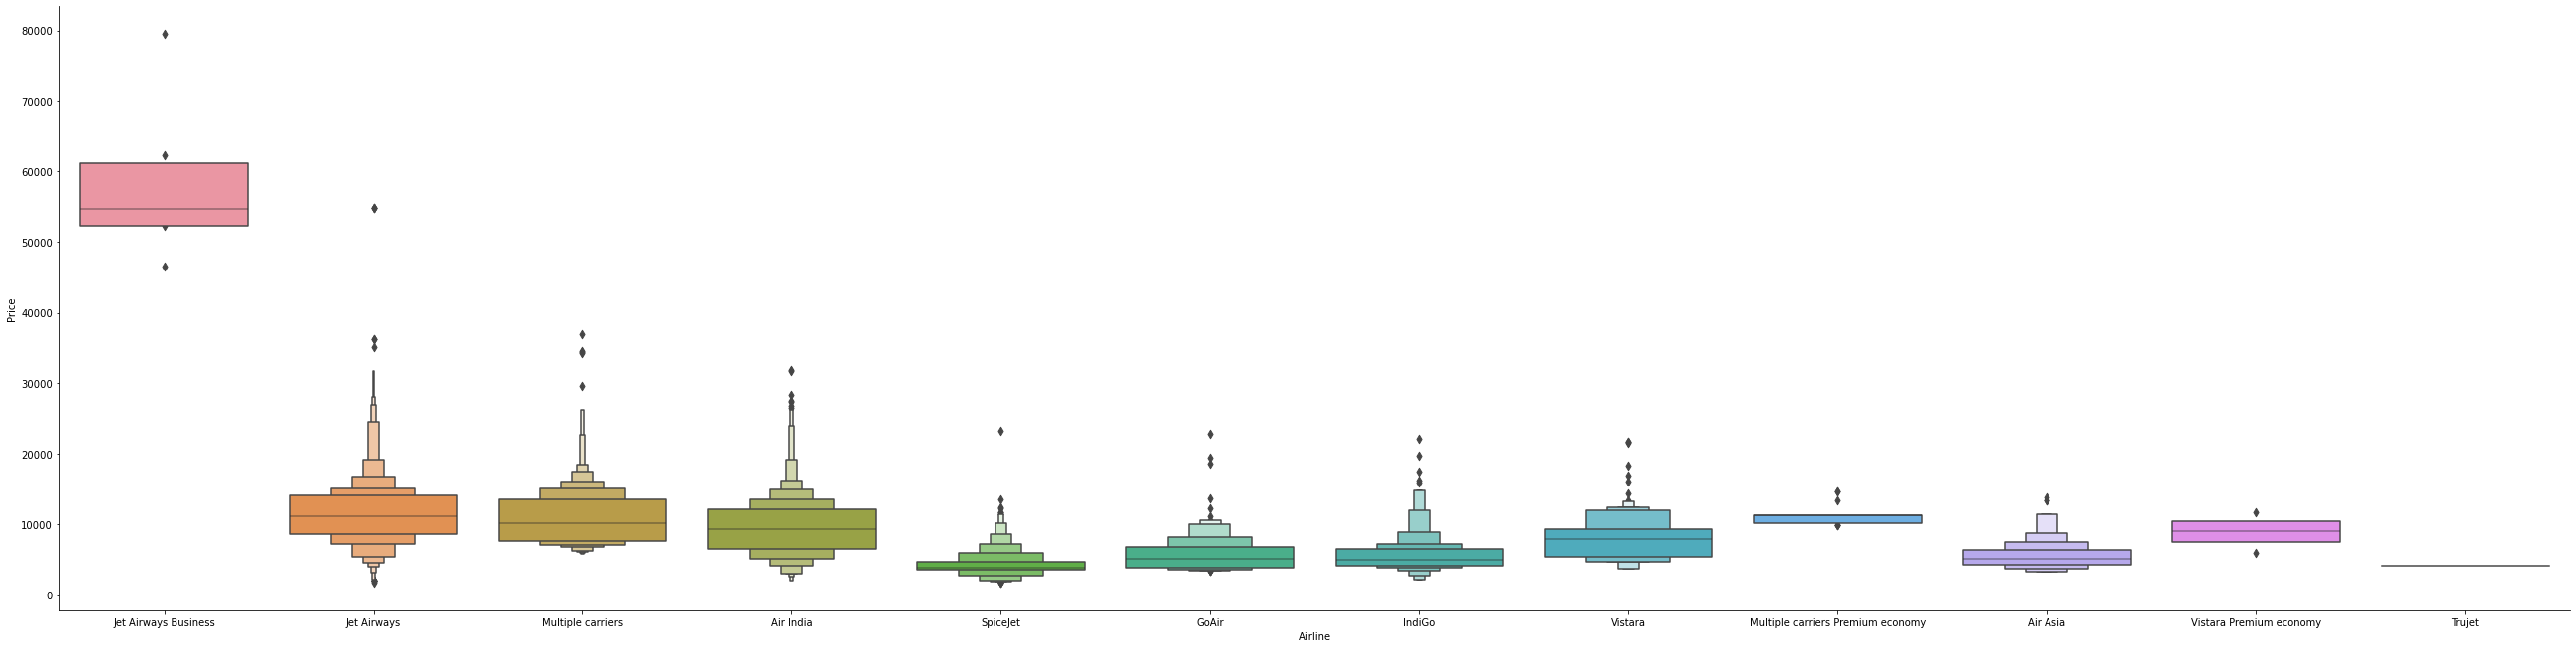

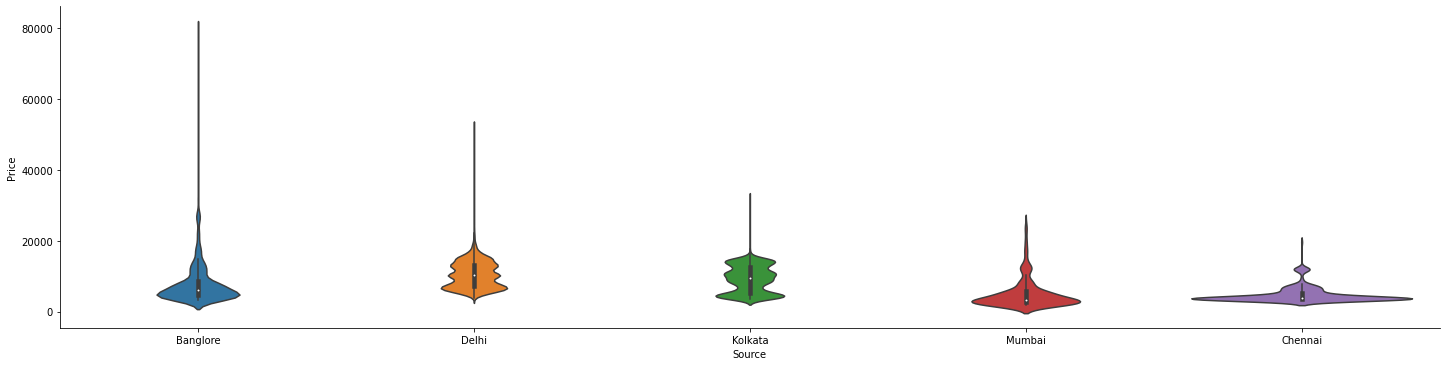

************************************************************************************************************
************************************************************************************************************


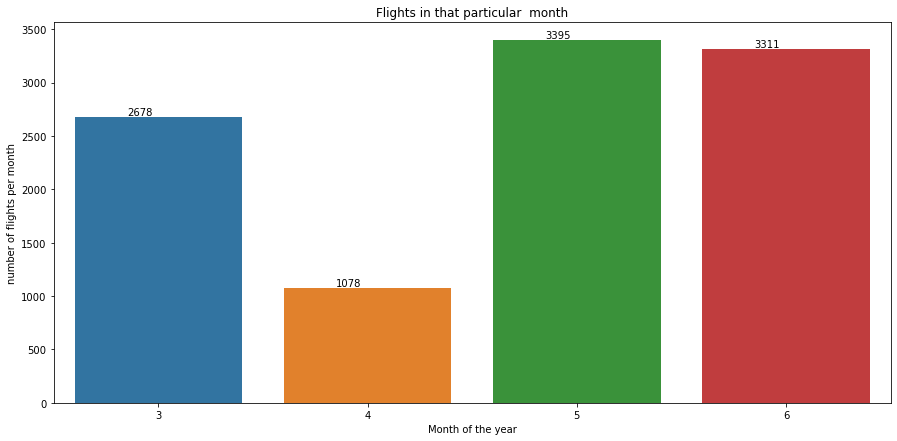

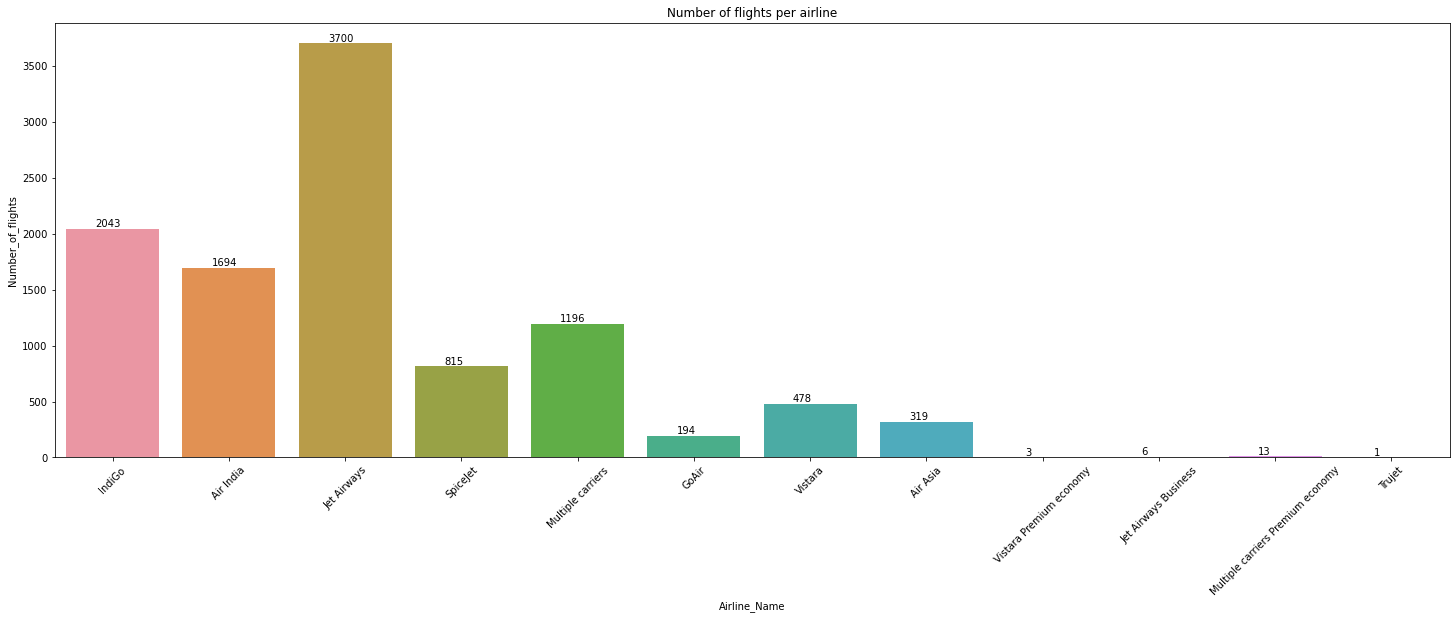

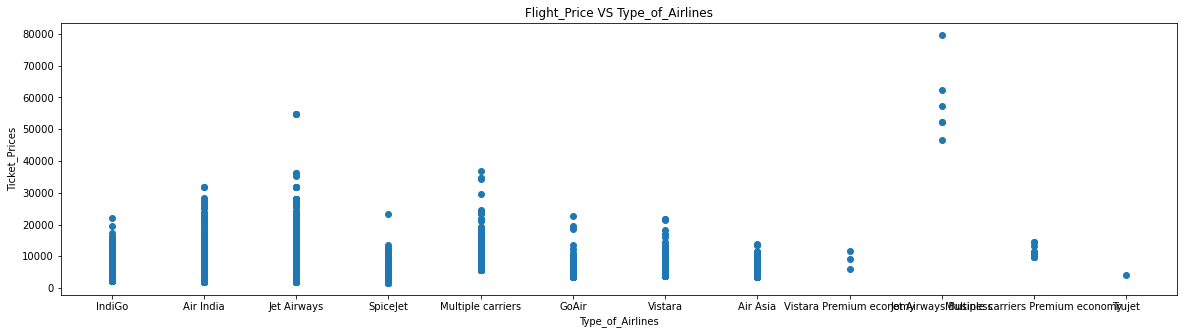

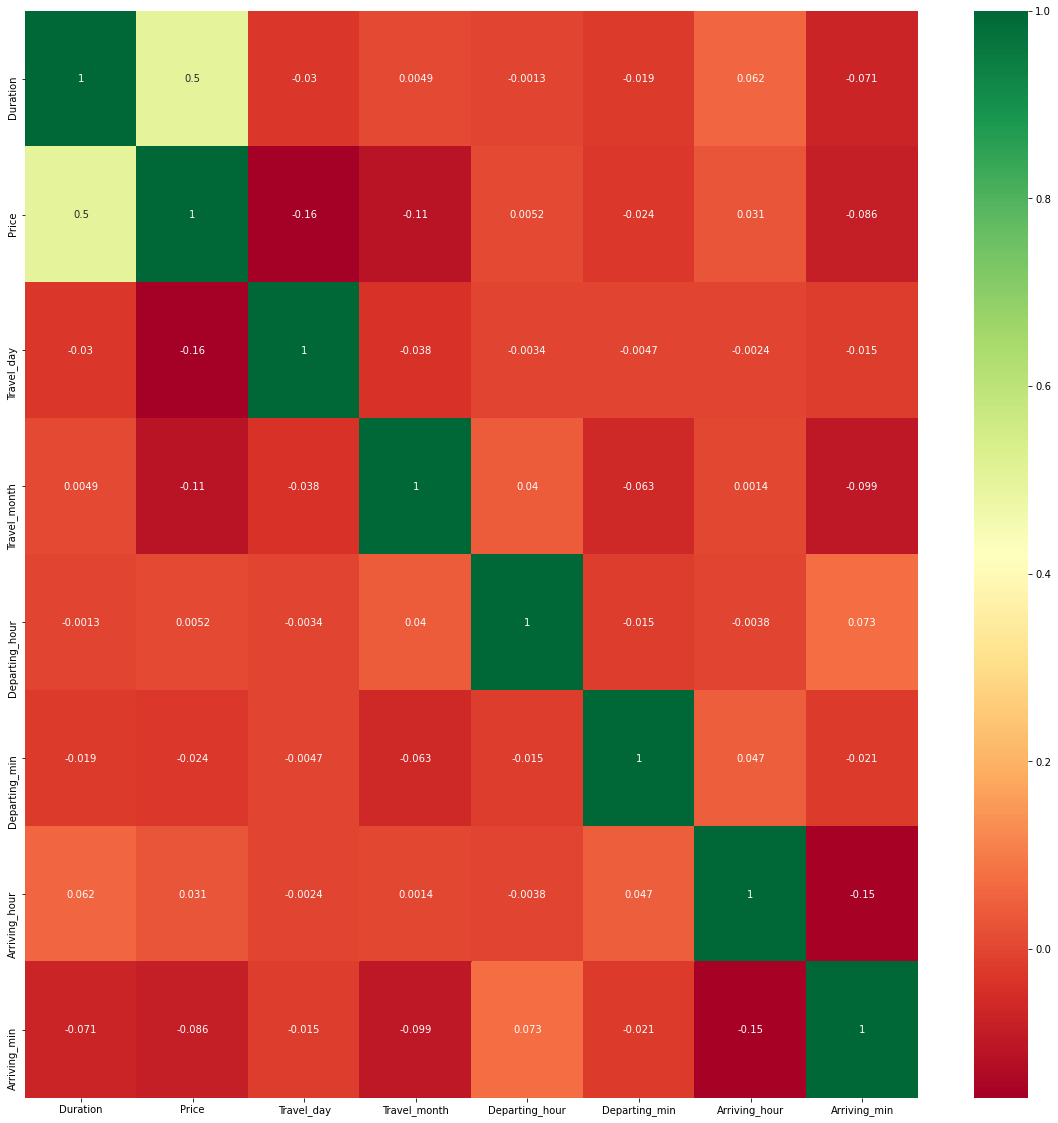

************************************************************************************************************
             Airline    Source Destination            Route  Duration  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK       655   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR       240   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1425   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK       780   
4           Air Asia  Banglore       Delhi        BLR → DEL       170   

  Total_Stops              Additional_Info  Travel_day  Travel_month  \
0      1 stop                      No info           6             6   
1      1 stop                      No info          12             5   
2      1 stop  In-flight meal not included          21             5   
3      1 stop                      No info          21             5   
4    non-stop                      No info          24             6   

   Departing_hour  

In [1]:
import numpy as np_numpy
import pandas as pd_pandas
import matplotlib.pyplot as plt_matplotlib
import seaborn as sns_seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import *
import csv



# user defined Classes


from DataPreprocess import DataPreprocessing
from Plotting_of_data import Graph_plot
from LassoRegressionofdata import  Lasso_regressor
from Decisiontreeregression import  Decision_tree_regression


print("************************************************************************************************************")


trained_data_df = pd_pandas.read_excel("Taining_data.xlsx")
print(trained_data_df.head(15))



print("************************************************************************************************************")


# the below are the columns that our dataset contains.

print(trained_data_df.columns)
print(' ')




#to get better undrstanding about our dataset we use the below command

print(trained_data_df.info())
print(' ')


print("************************************************************************************************************")


# more insights about our dataset

print(trained_data_df.describe())

print(' ')


print("************************************************************************************************************")


print('Now  we are preprocessing our data  so that we can remove all the null values and alsoduplicate values so that we will get more accuarate results')

print('')



# isnull function is used below to find the number of null values  

print(trained_data_df.isnull().head())



print('#Below we are finding the number of null values in our dataset with the help of isnull and sum functions.')

print(trained_data_df.isnull().sum()) 



print("************************************************************************************************************")



# in the next step we are going to drop NaN values from our dataset 

#in the next step we are going to  find the Duplicate Values from our dataset

#in the next step we are going to  Drop  the Duplicate Values from our dataset







object_datapreprocess=DataPreprocessing()
# print(dir(DataPreprocessing))


#Using object we are preprocessing the test data


trained_data_df=object_datapreprocess.train_dataprocess(trained_data_df)
# trained_data_df.isnull().sum()


# we are finding what all are the unique airlines that are present in our dataset and their respective counts
print('unique airlines that are present in our dataset and their respective counts')
trained_data_df["Airline"].unique()
print(trained_data_df["Airline"].value_counts())


# the unique routes of all airlines that  are present in our Dataset  
print("unique routes of all airlines that  are present in our Dataset ")
trained_data_df["Route"].unique()






print("************************************************************************************************************")




#now we are going through the test data 
test_data_df = pd_pandas.read_excel("Testing_dataset.xlsx")


'''Below  we are checking whether any null values are presnt in our 
test data if the data contains any null values we gonna remove them'''

test_data_df = object_datapreprocess.test_dataprocess(test_data_df)





print("************************************************************************************************************")

# we are creating the object for the class Graphplot

object_of_Graph_plot = Graph_plot()

# we are plotting the Airline versus its  price with  the help of a catplot from the below figure 
#we come to know that Jet airways has the most outliers with respect to price

object_of_Graph_plot.cat_plots(trained_data_df)




'''we are plotting the source  versus its  price with  the help of a Violin plot from the below figure we come to know that passengers who are travelling from Bangalore has the most outliers with respect to price
and Chennai has the lease outliers'''

object_of_Graph_plot.violin_plots(trained_data_df)






print("************************************************************************************************************")





# we are splitting the journey date and departure time and arrival time from the Train data to separate fields 
# we get the datframe with the new columns for the training data 

trained_data_df=object_datapreprocess.train_data_featuring(trained_data_df)

trained_data_df.head()

# ********************************************* writing to csv *********************************************

trained_data_df.to_csv('modified_dataset.csv')


test_data_df=object_datapreprocess.test_data_featuring(test_data_df)




print("************************************************************************************************************")


# we are plotting a Bar chart for the Number of flights versus Months  of trained data
object_of_Graph_plot.Bar_chart(trained_data_df)


# here is the Bar chart comparing Airlines and number 
object_of_Graph_plot.number_of_airlines(trained_data_df)


# with the help of Scatter Plot we are  comparing ticket prices and airlines

object_of_Graph_plot.scatter_plot(trained_data_df)


# Plotting Correlation
#Below is the correlation Grapgh for the Tarining data we used heat map for representing it 




object_of_Graph_plot.heat_map_graph(trained_data_df)




print("************************************************************************************************************")


#we get the datframe with the new columns for the Test data 
print(test_data_df.head())




print("************************************************************************************************************")





# lets drop the price from the trained data and staore it in new varaible  
data_without_price = trained_data_df.drop(["Price"], axis=1)


#  separating  Numerical, Categorical  Data from both Train and test data
trained_ctg_data = data_without_price.select_dtypes(exclude=['int64', 'float','int32'])
trained_num_data = data_without_price.select_dtypes(include=['int64', 'float','int32'])

test_ctg_data = test_data_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_num_data  = test_data_df.select_dtypes(include=['int64', 'float','int32'])


test_ctg_data.head()
trained_ctg_data.head()


#we are encoding labels to the categorical columns i.e we are giving numbers instead of names
label_Encoder = LabelEncoder()
trained_ctg_data = trained_ctg_data.apply(LabelEncoder().fit_transform)
test_ctg_data = test_ctg_data.apply(LabelEncoder().fit_transform)

# Concatenating both Catagorical Data and Numerical Data

X_cat_num = pd_pandas.concat([trained_ctg_data, trained_num_data], axis=1)
Y_price = trained_data_df['Price']
test_set_cat = pd_pandas.concat([test_ctg_data, test_num_data], axis=1)
X_cat_num.head()

trained_ctg_data.head()



print("************************************************************************************************************")


X_value_train, X_value_test, Y_value_train, Y_value_test = train_test_split(X_cat_num, Y_price, test_size = 0.3, random_state = 42)


#Below are the sizes of traing input , training output, testing input, testing output

print("Training input: ", X_value_train.shape)
print("training output:", Y_value_train.shape)
print("Test input", X_value_test.shape)
print("Testing output:", Y_value_test.shape)



print("************************************************************************************************************")


In [2]:


#Lasso Regression on the Dataset


# we created the object for the class Lasso_regressor
object_of_Lasso_regressor = Lasso_regressor()

#Below are the  results for Lasso Regressor Model for the given training  data:
object_of_Lasso_regressor.Lasso_regression_dataset(X_value_train, X_value_test, Y_value_train, Y_value_test)




print("************************************************************************************************************")


# Decision Tree Regression 


# we are creating the object for the class Decision_tree_regression

object_of_Decisiontree_regressor = Decision_tree_regression()

#Below are the  results for Decision tree Regressor Model for the given training  data:
object_of_Decisiontree_regressor.decision_regression(X_value_train, X_value_test, Y_value_train, Y_value_test)



print("************************************************************************************************************")



lasso_score_regression_train = object_of_Lasso_regressor.Lasso_regression_scores(X_value_train, X_value_test, Y_value_train, Y_value_test)[0]
lasso_score_regression_test = object_of_Lasso_regressor.Lasso_regression_scores(X_value_train, X_value_test, Y_value_train, Y_value_test)[1]





decision_tree_regression_trainscore= object_of_Decisiontree_regressor.decision_regression_scores(X_value_train, X_value_test, Y_value_train, Y_value_test)[0]

decision_tree_regression_testscore = object_of_Decisiontree_regressor.decision_regression_scores(X_value_train, X_value_test, Y_value_train, Y_value_test)[1]




print(lasso_score_regression_train,lasso_score_regression_test)

print(decision_tree_regression_trainscore,decision_tree_regression_testscore)


print(" ")



print("************************************************************************************************************")

# Now we are comparing both the lasso and decision tree regression  models 
Our_predicted_models = pd_pandas.DataFrame({
    'Name_of_the_Model': [  'Lasso Regression','Decision Tree Regressor'],
    'model_train_Score': [  lasso_score_regression_train, decision_tree_regression_trainscore],
    'Model_Test_Score': [ lasso_score_regression_test, decision_tree_regression_testscore]})
print(Our_predicted_models)






print("************************************************************************************************************")


header = ['Name_of_the_Model', 'model_train_Score', 'Model_Test_Score']

data1=['Lasso Regression',lasso_score_regression_train, lasso_score_regression_test]
data2=['Decision Tree Regressor',decision_tree_regression_trainscore,decision_tree_regression_testscore]

with open('Output.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data1)
    writer.writerow(data2)
    

RMSE i.e Root Mean Squared Error value is :  3560.853987663486
Mean Absolute % Error for the training data is :  32
R-Squared value for the training data is :  0.4143339932536655

Below are the  results for Lasso Regressor Model for the given Test  data:
RMSE i.e Root Mean Squared Error value is :  3459.384927631988
MMean Absolute % Error for the test data isr:  32
R-Squared value for the test data is:  0.4237767638929625

************************************************************************************************************
Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  489.13289377398775
Mean Absolute % Error:  2
R-Squared:  0.9889491565855519

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  1917.7397259741642
Mean Absolute % Error:  9
R-Squared:  0.8229188560452961

************************************************************************************************************
-252062.5 -248119.29
99.36 82.15
 
*****************